# DPMM Model criticism

Cluster sizes and Edward's PPC plots.

**Important**: restart the kernel when changing the experiment to evaluate

## Experiment to evaluate

In [1]:
EXPERIMENT_NAME = '30-Nov-2017@17-25-22-DPMM'

In [2]:
%matplotlib inline

import logging
import os

import numpy as np
import edward as ed
import tensorflow as tf
import matplotlib.pyplot as plt

from neural_clustering.criticize import (plot, restore,
                                         store_cluster_assignments,
                                         ppc_plot,
                                         summarize_experiment)
from neural_clustering import config

/Users/Edu/miniconda3/envs/test-project/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

logging.basicConfig(level=logging.INFO)

In [4]:
cfg = config.load('../config.yaml')

In [5]:
exp = restore.experiment(cfg, EXPERIMENT_NAME)
exp.keys()

dict_keys(['sigmasq', 'qz', 'qmu', 'qbeta', 'x_train', 'params', 'x_pred'])

In [6]:
x_pred = exp['x_pred']
x_train = exp['x_train'].astype('float32')

## Summarize experiment

In [7]:
summarize_experiment(cfg, EXPERIMENT_NAME)

inference_algoritm,model_type,name,git_hash,timestamp,inference_params,truncation_level
KLqp,DPMM,30-Nov-2017@17-25-22-DPMM,476d12b model fixes,2017-11-30T17:25:22.180357,"{'n_iter': 50000, 'n_samples': 3}",10


## Get cluster ssignments

Find cluster assignments. Also save the assignments (this will later be used in notebook 5).

In [8]:
clusters = store_cluster_assignments(cfg, exp['x_train'], exp['qmu'], exp['params'])

INFO:neural_clustering.criticize.criticize:Cluster assignmens stored in /Users/Edu/data/neural-clustering/sessions/30-Nov-2017@17-25-22-DPMM/clusters.npy


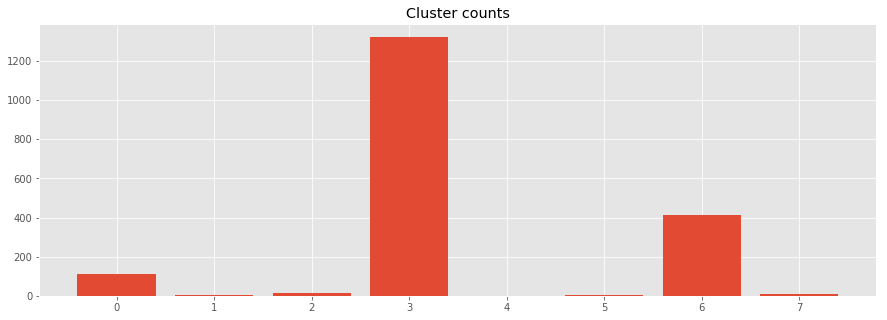

In [9]:
plot.cluster_counts(clusters)

## Log likelihood and mean squared error

Evaluate log likelihood and mean squared error.

In [10]:
log_lik = ed.evaluate('log_likelihood', data={x_pred: x_train})
mse = ed.evaluate('mean_squared_error', data={x_pred: x_train})
print(f'Log likelihood is: {log_lik:0.2f}')
print(f'Mean squared error is: {mse:0.2f}')

Log likelihood is: -64910.14
Mean squared error is: 25.53


## Posterior predictive checks

PPC plots for mean, max and min.

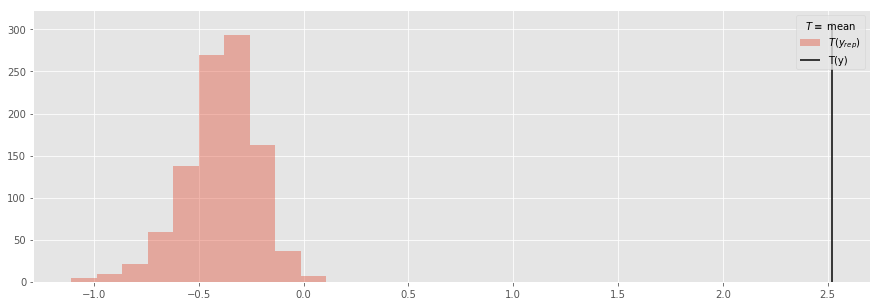

In [11]:
ppc_plot(lambda xs, mus: tf.reduce_mean(xs[x_pred]), 'mean', x_pred, x_train)

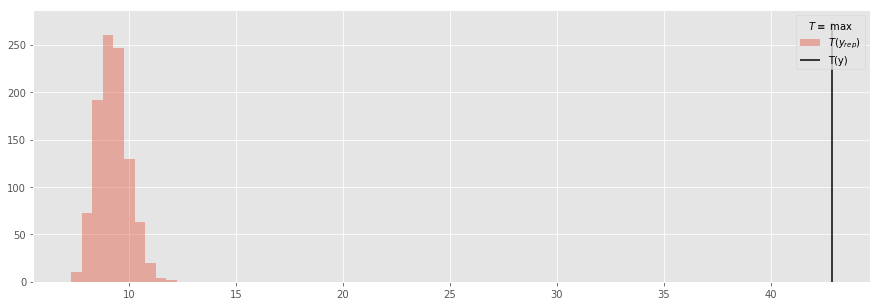

In [12]:
ppc_plot(lambda xs, mus: tf.reduce_max(xs[x_pred]), 'max', x_pred, x_train)

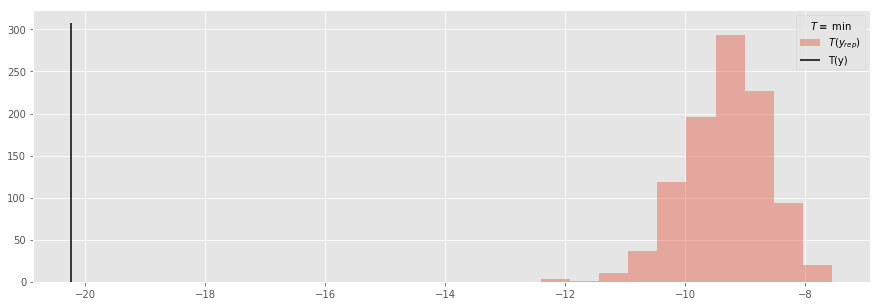

In [13]:
ppc_plot(lambda xs, mus: tf.reduce_min(xs[x_pred]), 'min', x_pred, x_train)